# Final Project 3 Explanatory Analysis


## Hypothesis
bedrooms, bathrooms, description, created, features, latitude, longtitude, photos, and price will allow us to predict interest level for listings on Renttop


## Explanatory Analysis

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import googlemaps
import time
%matplotlib inline

In [64]:
# load train data
train=pd.read_json('train.json')

In [ ]:
#test=pd.read_json('test.json')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


The data set is reasonably good. No apparent nulls. 

In [5]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


Some columns can be dropped! Column building_id, listing_id, manager_id can be dropped. 

### Display_address and Street_address

In [51]:
len(train.display_address.unique())

8826

In [52]:
len(train.street_address.unique())

15358

If both display_street and stree_address are set to categorical variable, there will be too many catorical variables. SO we will drop these two columns and instead use longitude and latitude. 

In [65]:
train=train.drop(['building_id', 'listing_id', 'manager_id','display_address','street_address'], 1)
train.head()

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price
10,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,[],medium,40.7145,-73.9425,[https://photos.renthop.com/2/7211212_1ed4542e...,3000
10000,1.0,2,2016-06-12 12:19:27,,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,-73.9667,[https://photos.renthop.com/2/7150865_be3306c5...,5465
100004,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...","[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,-74.0018,[https://photos.renthop.com/2/6887163_de85c427...,2850
100007,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,"[Hardwood Floors, No Fee]",low,40.7539,-73.9677,[https://photos.renthop.com/2/6888711_6e660cee...,3275
100013,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,[Pre-War],low,40.8241,-73.9493,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350


### Interest_level

In [39]:
train.interest_level.value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [ ]:
Easy to work with numbers then words, replace them with 0 1 2 

In [66]:
train=train.replace({"interest_level": {"low": 0, "medium": 1, "high": 2}})
train.head()

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price
10,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,[],1,40.7145,-73.9425,[https://photos.renthop.com/2/7211212_1ed4542e...,3000
10000,1.0,2,2016-06-12 12:19:27,,"[Doorman, Elevator, Fitness Center, Cats Allow...",0,40.7947,-73.9667,[https://photos.renthop.com/2/7150865_be3306c5...,5465
100004,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...","[Laundry In Building, Dishwasher, Hardwood Flo...",2,40.7388,-74.0018,[https://photos.renthop.com/2/6887163_de85c427...,2850
100007,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,"[Hardwood Floors, No Fee]",0,40.7539,-73.9677,[https://photos.renthop.com/2/6888711_6e660cee...,3275
100013,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,[Pre-War],0,40.8241,-73.9493,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350


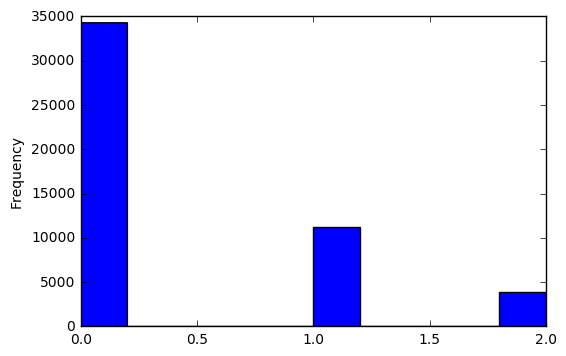

In [67]:
train['interest_level'].plot.hist();

### Bedrooms

In [45]:
train['bedrooms'].value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

In [ ]:
Check if 0 bedrooms make sense.

In [50]:
train[train.bedrooms==0].head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
100030,1.0,0,0,2016-04-14 01:10:30,New to the market! Spacious studio located in ...,York Avenue,[],0,40.7769,6869199,-73.9467,e32475a6134d6d18279946b7b20a0f12,[https://photos.renthop.com/2/6869199_06b2601f...,1950,1661 York Avenue
100051,1.0,0,bfb9405149bfff42a92980b594c28234,2016-04-18 02:36:00,Stunning full renovated studio unit. High cei...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",1,40.7439,6889043,-73.9743,dbbb6b990661b1e507a387f019bcb1a0,[https://photos.renthop.com/2/6889043_a3e1c004...,2350,340 East 34th Street
100083,1.0,0,10901f921370e636cef42c4bbed02483,2016-04-21 02:17:28,Enjoy the Upper West Side life-style! This ap...,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",1,40.7897,6904268,-73.9760,92ff104c90a9c40d153ea970e19c27c1,[https://photos.renthop.com/2/6904268_657c825a...,2750,250 West 88th Street
100096,1.0,0,0,2016-04-04 03:47:57,Location: 141st St. and Malcolm X BlvdSubway: ...,West 141st Street,"[prewar, Dogs Allowed, Cats Allowed, LOWRISE, ...",0,40.8184,6821706,-73.9389,fb520ae87b8a3b3eb646e137f0c8ddc8,[https://photos.renthop.com/2/6821706_bf71ecb1...,1300,111-115 West 141st Street
100098,1.0,0,7d2a37e6633ae6e663fca13dfa55d9a9,2016-04-17 02:16:42,Located in one of Manhattan's most desirable a...,West 58th Street,"[Doorman, Elevator, Pre-War, Dishwasher, Dogs ...",2,40.7649,6885742,-73.9763,32bf3cd19652f17e3764c055b7a9178e,[https://photos.renthop.com/2/6885742_51e79649...,1980,57 West 58th Street


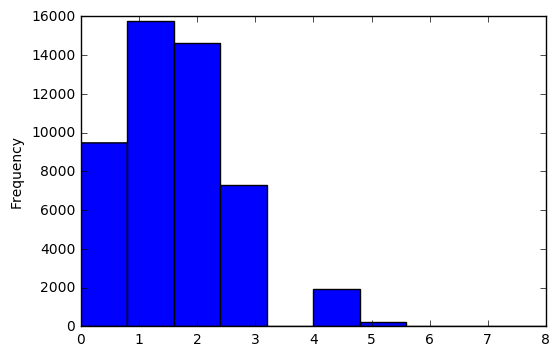

In [47]:
train['bedrooms'].plot.hist();

### Bathrooms

In [49]:
train['bathrooms'].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

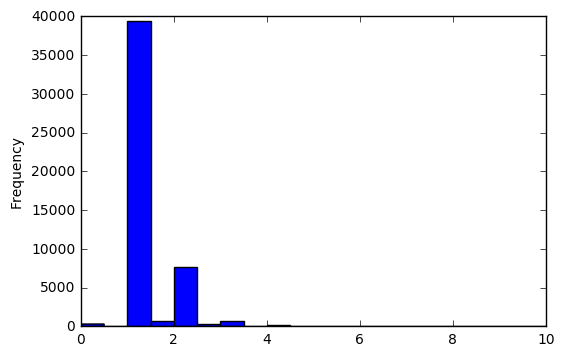

In [69]:
train['bathrooms'].plot.hist(bins=20);

### Latitude and Longitude

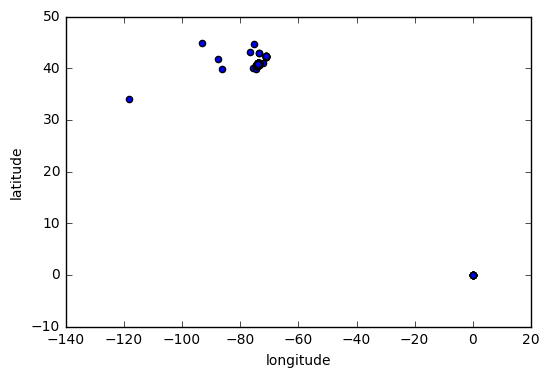

In [23]:
train[['latitude','longitude']].plot.scatter(x='longitude',y='latitude');

From the graph, we can see there are outliners. To exclude the outliners, we can get the latitude and longitude ranges by clicking on Google Map. Latitude=[40.496217,40.910596], longitude=[-75.255653,-73.701978]. Loose the numbers 0.5 to exlude outliners.

In [38]:
train[(train.longitude<-75.30)|(train.longitude>-73.75)|(train.latitude<40.45)|(train.latitude>40.95)]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
100140,1.0,2,920cbea4c790314471335c3a64496c9e,2016-04-23 03:51:55,Check Out This Lovely Apartment Locate...,260th St,[],medium,40.7493,6916033,-73.7142,17c1a97107fcbd846a1e16b576b450f6,[https://photos.renthop.com/2/6916033_06d6a6c7...,1900,74-21 260th St
100346,1.0,1,e9f8fbe6cce51fe5e4418e1828bc6546,2016-04-15 02:52:24,"When you choose Infinity, you'll move into an ...",201 Commons Park,"[Fitness Center, Outdoor Pool, Residents Loung...",low,41.0412,6875908,-73.5400,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/6875908_34ef0687...,2195,201 Commons Park
104822,1.0,0,437454e6d44ae7c94f60b1b6507d084a,2016-04-16 02:10:48,NEWLY RENOVATED BEAUTIFUL SPACIOUS HUGE STUDIO...,"E 46th St,","[Doorman, Elevator, Walk in Closet(s), High Ce...",low,39.8395,6881361,-86.1527,8439c2c1ab6949a7447b00971e2f73a9,[https://photos.renthop.com/2/6881361_f8efe79e...,2650,"235 E 46th St,"
106350,5.0,6,0,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,"[Garden/Patio, Terrace, No Fee, Outdoor Space,...",low,0.0000,6888639,0.0000,c639a76f31c41923cd91d23875a72264,[https://photos.renthop.com/2/6888639_87eb648f...,9995,259 Decatur Street
108994,1.0,0,0,2016-04-03 17:08:55,"Sunny, spacious garden level studio apartment ...",268 Bainbridge Street,"[Common Outdoor Space, Private Outdoor Space, ...",low,40.1159,6819739,-74.6267,8e75480baef379386edc3880bba576fd,[https://photos.renthop.com/2/6819739_79b1aee8...,1650,268 Bainbridge Street
109644,2.0,2,69111122f465f6d186a7c750282b9d06,2016-04-15 02:53:26,This property is designed for the professional...,101 Washington Boulevard,"[Fitness Center, Outdoor Pool, Residents Loung...",low,41.0411,6875929,-73.5423,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/6875929_c440766e...,2205,101 Washington Boulevard
114028,1.0,1,6869a3c2a96003e9992d6cd1c3c4b299,2016-04-07 01:41:55,Come for the studio apartment but stay for all...,Modern Studio in Amenity Filled 24 Hr. DM Bldg.,"[Cats Allowed, Dogs Allowed, Doorman, Elevator...",low,40.0450,6836479,-75.5214,c3b7c269756b10a84641f04868f30db1,[https://photos.renthop.com/2/6836479_2a5daff5...,2895,271 West 47TH Street
114490,1.0,0,6402cdb4f37a4a21c71e4a5f40917f9d,2016-04-16 04:36:50,Large garden apartment studio. Applica...,136-16 222nd St,[Cats Allowed],high,40.6755,6883600,-73.7490,b7a3cd83f4939964b606b8296c179a0a,[],1100,136-16 222nd St
114889,2.0,2,2adec6e74a834940cde0f05a8684d08f,2016-04-21 04:36:16,T_208-421-1596<br />kagglemanager@rent...,550 Liberty Street,"[Fitness Center, Cats Allowed, Dogs Allowed]",low,42.2019,6906214,-70.9846,43389561311270c553bb83a168a07a6b,[https://photos.renthop.com/2/6906214_4ab3c74a...,2541,550 Liberty Street
117255,1.0,1,0,2016-04-06 13:27:48,"One BHK apartment is on rent from 20th April, ...",176 Presidents lane,"[Furnished, Parking Space, No Fee, Elevator, L...",low,42.2509,6834490,-71.0060,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6834490_75f7d508...,1670,"176 Presidents lane,Quincy,MA"


In [71]:
train=train[(train.longitude>-75.30)|(train.longitude<-73.75)|(train.latitude>40.45)|(train.latitude<40.95)]

###  Created

In [ ]:
For column created, the month will be extract to use as categorical varible to show seasonailty

In [77]:
def get_month(dt):
    return datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').month

In [78]:
train['created'].apply(get_month).value_counts()

6    17144
4    16411
5    15797
Name: created, dtype: int64

In [80]:
train['created']=train['created'].apply(get_month)
train.head()

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price
10,1.5,3,6,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,[],1,40.7145,-73.9425,[https://photos.renthop.com/2/7211212_1ed4542e...,3000
10000,1.0,2,6,,"[Doorman, Elevator, Fitness Center, Cats Allow...",0,40.7947,-73.9667,[https://photos.renthop.com/2/7150865_be3306c5...,5465
100004,1.0,1,4,"Top Top West Village location, beautiful Pre-w...","[Laundry In Building, Dishwasher, Hardwood Flo...",2,40.7388,-74.0018,[https://photos.renthop.com/2/6887163_de85c427...,2850
100007,1.0,1,4,Building Amenities - Garage - Garden - fitness...,"[Hardwood Floors, No Fee]",0,40.7539,-73.9677,[https://photos.renthop.com/2/6888711_6e660cee...,3275
100013,1.0,4,4,Beautifully renovated 3 bedroom flex 4 bedroom...,[Pre-War],0,40.8241,-73.9493,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350


### Description and Features

In [ ]:
Better descriptions and more features attract attentions. So there are some informationt to attract. For simpilicty, we will use the word counts for these two columns

In [82]:
train['description']=train.description.apply(len)

In [83]:
train['features']=train.features.apply(len)

In [84]:
train.head()

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price
10,1.5,3,6,588,0,1,40.7145,-73.9425,[https://photos.renthop.com/2/7211212_1ed4542e...,3000
10000,1.0,2,6,8,5,0,40.7947,-73.9667,[https://photos.renthop.com/2/7150865_be3306c5...,5465
100004,1.0,1,4,691,4,2,40.7388,-74.0018,[https://photos.renthop.com/2/6887163_de85c427...,2850
100007,1.0,1,4,492,2,0,40.7539,-73.9677,[https://photos.renthop.com/2/6888711_6e660cee...,3275
100013,1.0,4,4,479,1,0,40.8241,-73.9493,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350


### Photos

In [ ]:
Photos attracts attentions too. For simpilitcy, we use the photo counts for modeling

In [86]:
train['photos']=train.photos.apply(len)

In [87]:
train.head()

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price
10,1.5,3,6,588,0,1,40.7145,-73.9425,5,3000
10000,1.0,2,6,8,5,0,40.7947,-73.9667,11,5465
100004,1.0,1,4,691,4,2,40.7388,-74.0018,8,2850
100007,1.0,1,4,492,2,0,40.7539,-73.9677,3,3275
100013,1.0,4,4,479,1,0,40.8241,-73.9493,3,3350


### Price

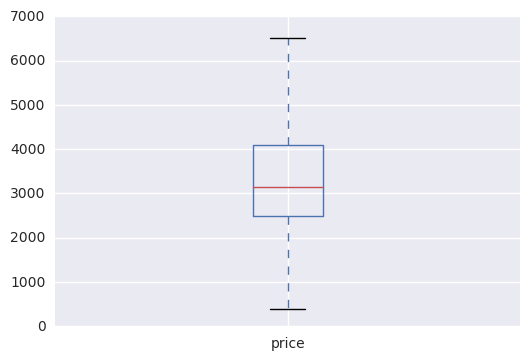

In [114]:
train['price'].plot(kind='box',ylim=[0,7000]);

In [112]:
train[train.price>100000]

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price
12168,1.0,2,6,0,5,0,40.8011,-73.9480,0,1150000
123877,0.0,0,4,1869,5,0,40.7161,-74.0080,20,135000
32611,1.0,2,6,0,5,0,40.7299,-74.0071,0,4490000
4620,1.0,0,6,503,3,2,40.7323,-73.8761,1,111111
55437,1.0,1,5,8,3,0,40.7676,-73.9844,0,1070000
57803,1.0,1,5,1035,5,0,40.7676,-73.9844,7,1070000


Need to exclude the above records

In [115]:
train=train[train.price<=100000]

In [124]:
len(train)

49346

In [120]:
train.head()

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price
10,1.5,3,6,588,0,1,40.7145,-73.9425,5,3000
10000,1.0,2,6,8,5,0,40.7947,-73.9667,11,5465
100004,1.0,1,4,691,4,2,40.7388,-74.0018,8,2850
100007,1.0,1,4,492,2,0,40.7539,-73.9677,3,3275
100013,1.0,4,4,479,1,0,40.8241,-73.9493,3,3350


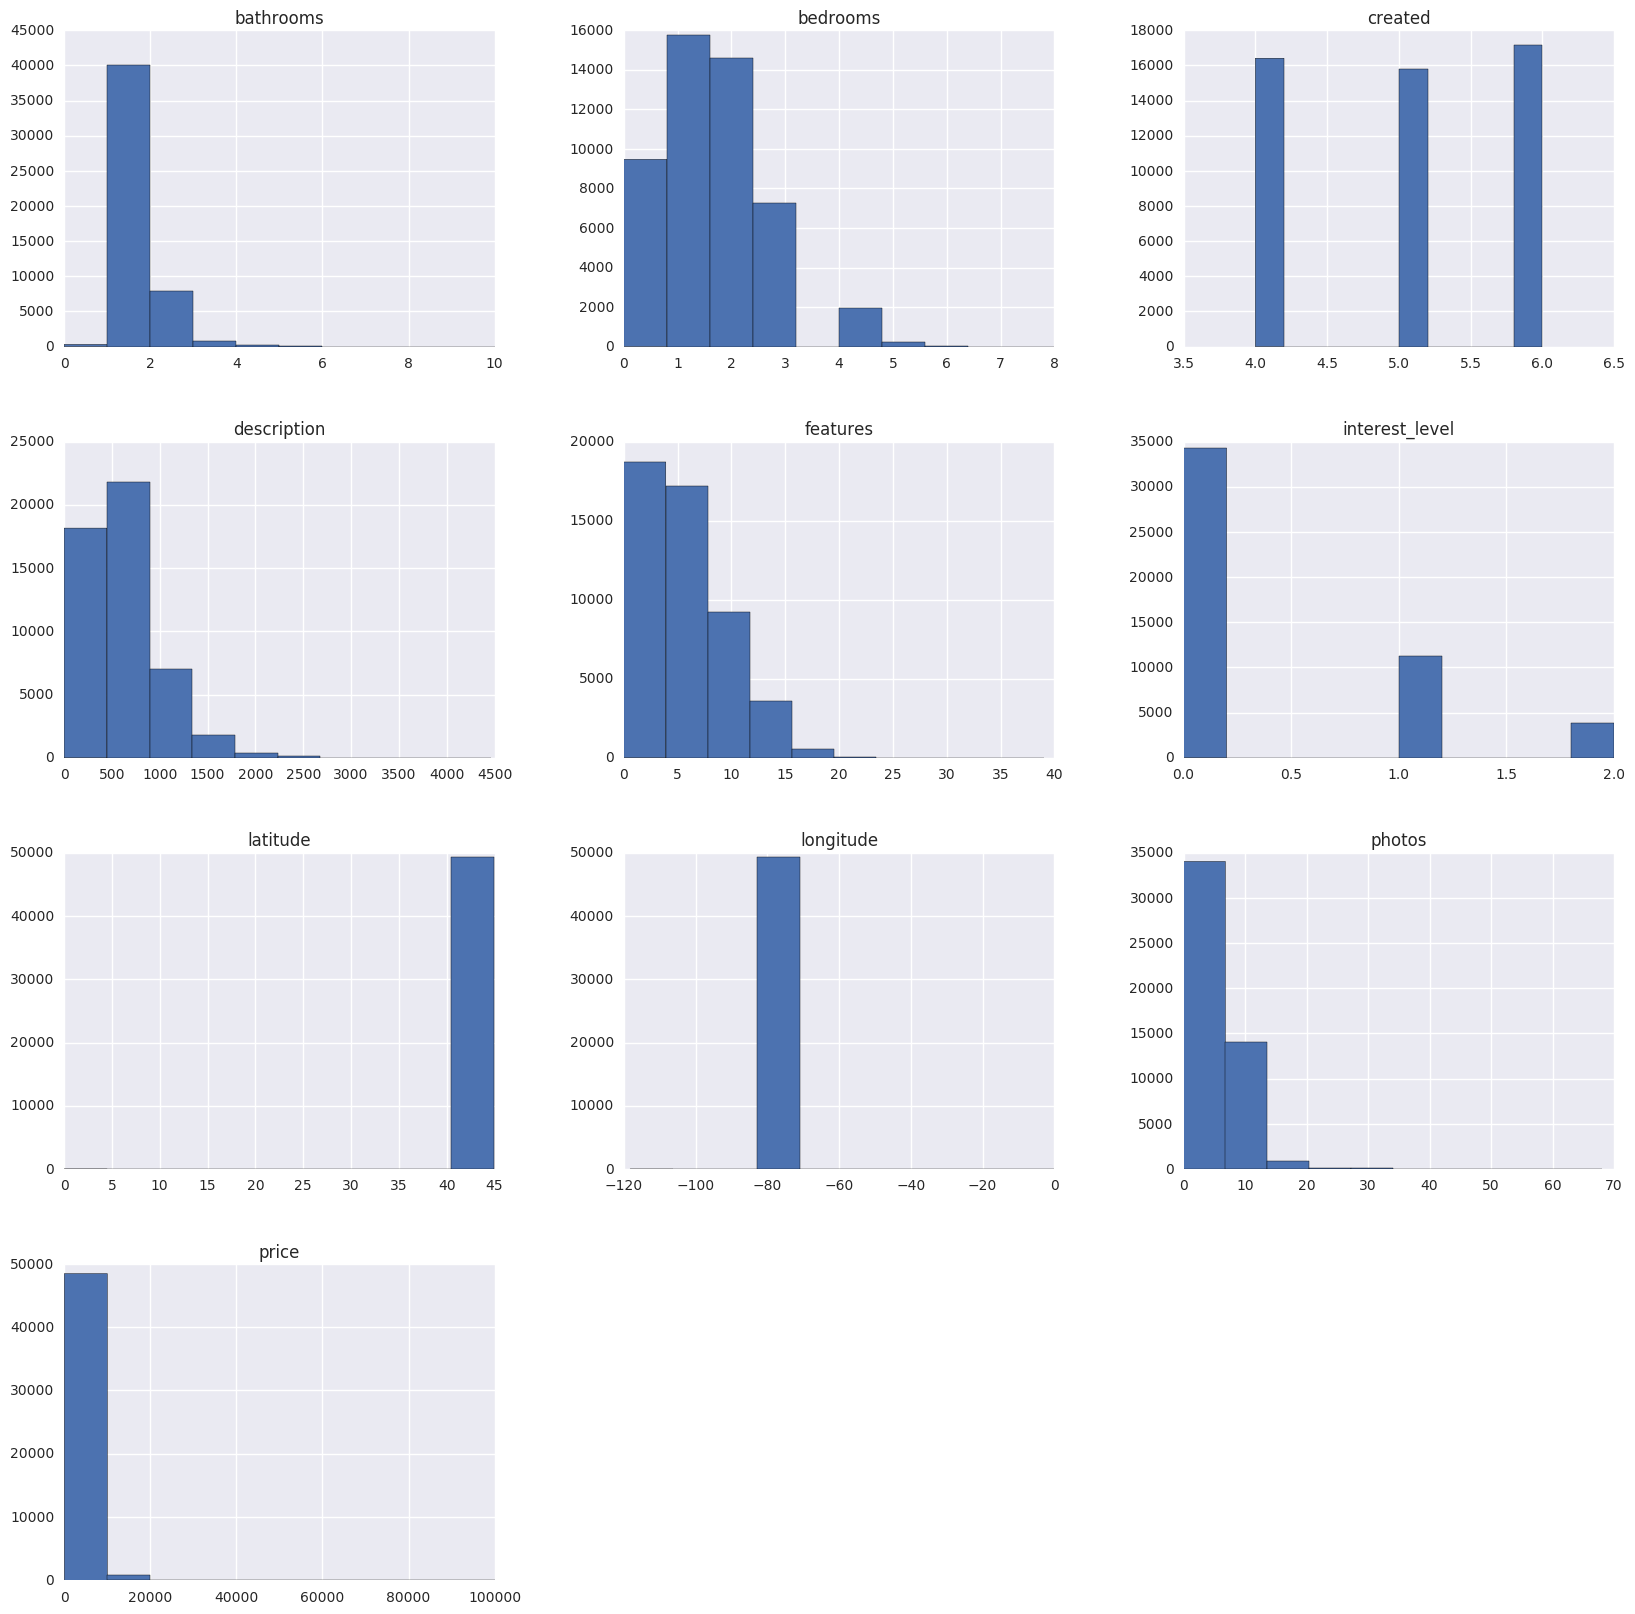

In [116]:
train.hist(figsize=(20,20));

### Relations

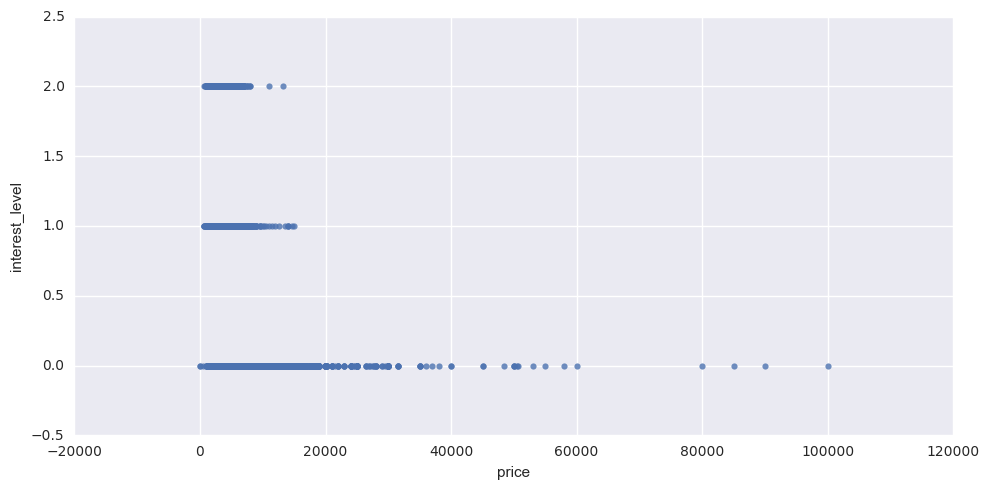

In [117]:
sns.lmplot('price', 'interest_level', 
           data=train, size=5, aspect=2,
           fit_reg=False, 
           line_kws={'linestyle':'-', 'linewidth':'1'});

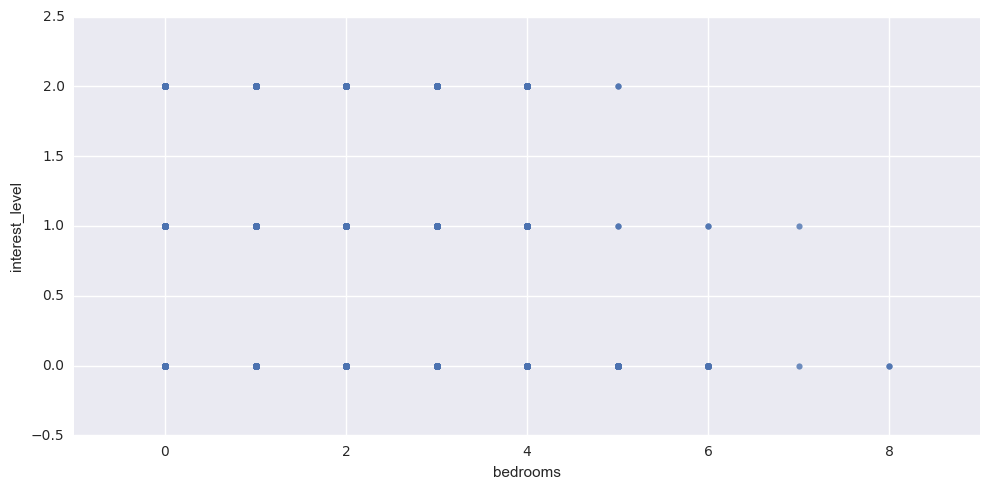

In [119]:
sns.lmplot('bedrooms', 'interest_level', 
           data=train, size=5, aspect=2,
           fit_reg=False, 
           line_kws={'linestyle':'-', 'linewidth':'1'});

### Convert Latitude and Longitude into Neighborhood

In [125]:
# removed the key for safety
gmaps = googlemaps.Client(key='')

In [ ]:
#function to get and save neighborhood info 
zip_list=[]
index_list=[]
def save_zip(df):
    for i in range(len(df)):
        d=df.iloc[i]
        try:
            res=gmaps.reverse_geocode((d['latitude'],d['longitude']))
            address=res[0]['address_components']
            for comp in address:
                if(comp['types'][0]=='neighborhood'):
                    zip_list.append(str(comp['long_name']))
                    index_list.append(df.index[i])
        except:
            pass
        if((i>1)and((i % 10)==0)):
            time.sleep(0.22)
            data2save=pd.DataFrame({'neighborhood':zip_list},index=index_list)
            data2save.to_csv('train_zip_.csv')

In [220]:
save_zip(train)

### Join train and train_zip

In [5]:
train_zip=pd.read_csv('train_zip_.csv', index_col=0)
train_zip.head()

,neighborhood
10,Williamsburg
10000,Upper West Side
100004,Lower Manhattan
100007,Midtown East
100013,Upper Manhattan


In [270]:
len(train_zip)

49081

In [226]:
train_zip.neighborhood.value_counts()

Midtown                   12380
Lower Manhattan            9985
Upper East Side            5582
Upper West Side            4132
Upper Manhattan            3036
Yorkville                  1716
Midtown West               1164
Long Island City            952
Midtown East                847
Hell's Kitchen              797
East Harlem                 649
Williamsburg                565
Bedford-Stuyvesant          517
East Village                507
Lincoln Square              506
Flushing                    440
Bushwick                    393
Crown Heights               366
Carnegie Hill               357
Park Slope                  277
Downtown Brooklyn           259
Brooklyn Heights            187
West Bronx                  183
Alphabet City               172
Clinton Hill                171
Roosevelt Island            158
Flatbush - Ditmas Park      150
Lower East Side             132
Bay Ridge                   131
Greenpoint                  126
                          ...  
South Si

In [228]:
len(train_zip.neighborhood.unique())

142

In [272]:
train=train.join(train_zip)
train.head()

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price,neighborhood
10,1.5,3,6,588,0,1,40.7145,-73.9425,5,3000,Williamsburg
10000,1.0,2,6,8,5,0,40.7947,-73.9667,11,5465,Upper West Side
100004,1.0,1,4,691,4,2,40.7388,-74.0018,8,2850,Lower Manhattan
100007,1.0,1,4,492,2,0,40.7539,-73.9677,3,3275,Midtown East
100013,1.0,4,4,479,1,0,40.8241,-73.9493,3,3350,Upper Manhattan


In [273]:
train[train.neighborhood.isnull()]

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price,neighborhood
100221,1.0,2,4,263,0,0,40.7306,-73.8519,1,2350,NaN
100663,1.0,0,4,1283,9,1,40.6898,-73.9797,8,2441,NaN
100850,2.0,3,4,1328,12,0,40.7847,-74.0059,12,3500,NaN
101401,1.0,1,4,16,4,1,40.8410,-73.9520,3,1700,NaN
102756,1.0,0,4,8,0,1,40.7291,-74.2224,7,695,NaN
102875,1.0,0,4,857,9,0,40.6968,-73.9829,5,2500,NaN
102984,2.0,2,4,282,1,0,40.7068,-73.9906,7,3900,NaN
103539,1.0,1,4,475,15,0,40.6969,-73.9830,9,2795,NaN
104341,1.0,2,4,835,11,1,40.6969,-73.9830,5,2700,NaN
104443,1.0,1,4,935,13,1,40.6969,-73.9830,6,2795,NaN


In [274]:
train=train.dropna()
train

,bathrooms,bedrooms,created,description,features,interest_level,latitude,longitude,photos,price,neighborhood
10,1.5,3,6,588,0,1,40.7145,-73.9425,5,3000,Williamsburg
10000,1.0,2,6,8,5,0,40.7947,-73.9667,11,5465,Upper West Side
100004,1.0,1,4,691,4,2,40.7388,-74.0018,8,2850,Lower Manhattan
100007,1.0,1,4,492,2,0,40.7539,-73.9677,3,3275,Midtown East
100013,1.0,4,4,479,1,0,40.8241,-73.9493,3,3350,Upper Manhattan
100014,2.0,4,4,8,0,1,40.7429,-74.0028,5,7995,Midtown
100016,1.0,2,4,579,8,0,40.8012,-73.9660,10,3600,Upper West Side
100020,2.0,1,4,948,8,0,40.7427,-73.9957,5,5645,Midtown
100026,1.0,1,4,24,4,1,40.8234,-73.9457,5,1725,Upper Manhattan
100027,2.0,4,4,1052,2,0,40.7278,-73.9808,9,5800,Lower Manhattan


In [275]:
train.to_csv('train_ready.csv')